# Preprocessing Household Electricity Consumption Data
This notebook demonstrates preprocessing steps on synthetic household electricity consumption data.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Synthetic_Household_Electricity_Consumption_Dataset.csv')
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,82.12,8.00,19.02
1,Air Conditioner,230,1588.76,4.21,40.17
2,Refrigerator,230,199.58,24.00,8.23
3,LED Bulb,230,15.94,7.90,7.15
4,Television,230,98.72,3.09,4.35


## Step 1: Check for Missing Values

In [20]:
missing_values = data.isnull().sum()
missing_values

Appliance                0
Voltage (V)              0
Power Consumption (W)    0
Daily Usage (hrs)        0
Monthly Usage (%)        0
dtype: int64

## Step 2: Standardize Numerical Data
Using `StandardScaler` to standardize *Power Consumption (W)* and *Daily Usage (hrs)*.

In [21]:
scaler = StandardScaler()
data[['Power Consumption (W)', 'Daily Usage (hrs)']] = scaler.fit_transform(data[['Power Consumption (W)', 'Daily Usage (hrs)']])
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%)
0,Fan,230,-0.905778,0.344560,19.02
1,Air Conditioner,230,0.801732,-0.190922,40.17
2,Refrigerator,230,-0.772658,2.605167,8.23
3,LED Bulb,230,-0.980782,0.330431,7.15
4,Television,230,-0.886965,-0.349164,4.35


## Step 3: Add Derived Feature - Daily Energy Consumption (Wh)
Calculate the daily energy consumption by multiplying *Power Consumption (W)* and *Daily Usage (hrs)*.

In [22]:
data['Daily Energy Consumption (Wh)'] = data['Power Consumption (W)'] * data['Daily Usage (hrs)']
data.head()

,Appliance,Voltage (V),Power Consumption (W),Daily Usage (hrs),Monthly Usage (%),Daily Energy Consumption (Wh)
0,Fan,230,-0.905778,0.344560,19.02,-0.312095
1,Air Conditioner,230,0.801732,-0.190922,40.17,-0.153068
2,Refrigerator,230,-0.772658,2.605167,8.23,-2.012904
3,LED Bulb,230,-0.980782,0.330431,7.15,-0.324081
4,Television,230,-0.886965,-0.349164,4.35,0.309697


## Saving the Preprocessed Dataset

In [23]:
processed_file_path = 'Preprocessed_Household_Electricity_Consumption_Dataset.csv'
data.to_csv(processed_file_path, index=False)
processed_file_path


'Preprocessed_Household_Electricity_Consumption_Dataset.csv'

## Data Visualization

In [24]:
# importing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Distribution of Power Consumption

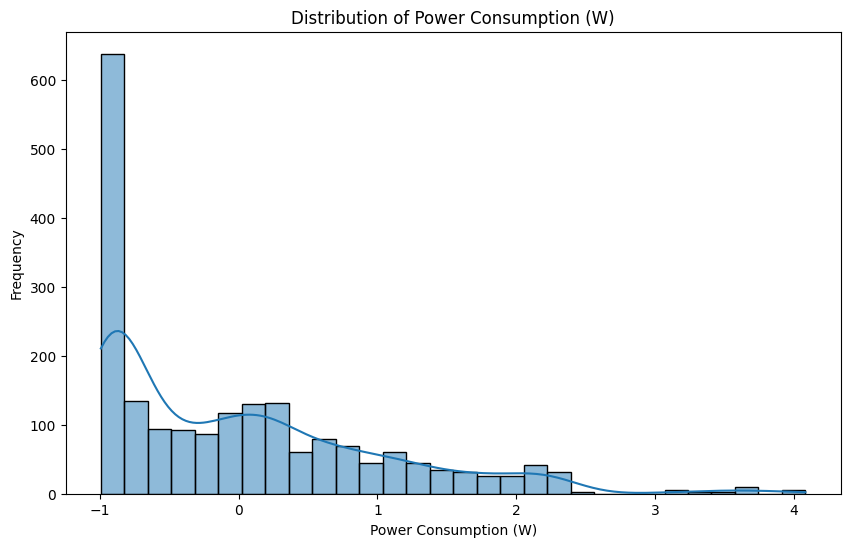

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Power Consumption (W)'], bins=30, kde=True)
plt.title('Distribution of Power Consumption (W)')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Frequency')
plt.show()


## Average Daily Usage by Appliance Type

C:\Users\avina\AppData\Local\Temp\ipykernel_22136\2572219192.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')
C:\Users\avina\AppData\Local\Temp\ipykernel_22136\2572219192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')


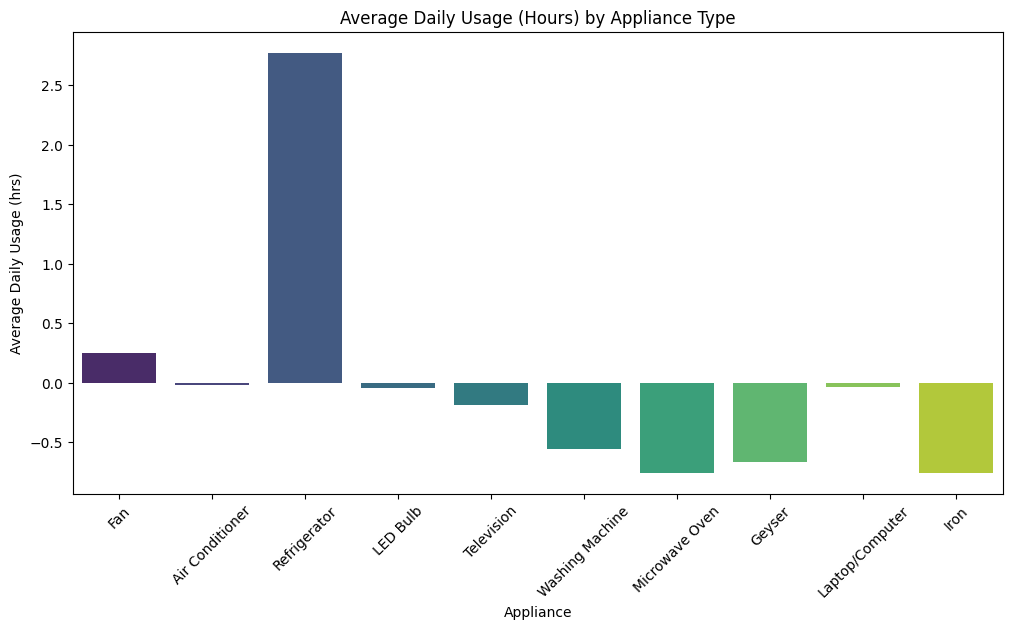

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Appliance', y='Daily Usage (hrs)', data=data, estimator='mean', ci=None, palette='viridis')
plt.title('Average Daily Usage (Hours) by Appliance Type')
plt.xticks(rotation=45)
plt.xlabel('Appliance')
plt.ylabel('Average Daily Usage (hrs)')
plt.show()

## Power Consumption vs. Daily Energy Consumption

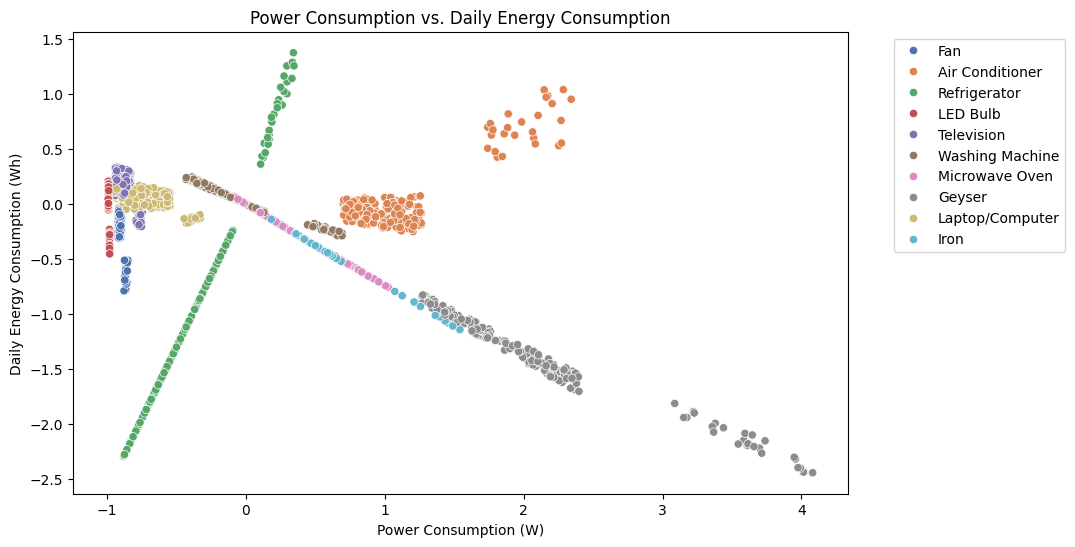

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power Consumption (W)', y='Daily Energy Consumption (Wh)', data=data, hue='Appliance', palette='deep')
plt.title('Power Consumption vs. Daily Energy Consumption')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Daily Energy Consumption (Wh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation Heatmap

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


ValueError: could not convert string to float: 'Fan'

<Figure size 800x600 with 0 Axes>